<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/Capstone_2_Honeybees_and_Pesticides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 2 - Honeybees and Pesticides

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [0]:
#upload the dataset
bees = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\vHoneyNeonic_v03.csv')

In [0]:
#preview the dataset
bees.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


This dataset contains information regarding honey production in the USA from 1991 to 2017. It contains information ranging from honey price, total honey produced, yields per colony, states, regions, and amounts of five different neonicotinoid pesticides used in kg. With all of the media attention on declining bee populations, we may find some interesting information within this dataset. One must keep in mind that bees are travelers and can be exposed to many different chemicals. This dataset only takes 5 pesticides into account. 

# Data Exploration

In [0]:
#summary of the dataset
bees.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1132.000000,1132.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,62452.296820,61.809187,4.317093e+06,1.202020e+06,1.485928,4.932350e+06,2003.698763,30.275618,9260.332067,8944.121564,5293.034749,619.875642,102.432291,24219.796313
std,90698.022209,20.701807,6.962385e+06,2.026242e+06,0.966583,8.551674e+06,7.783332,15.586671,27769.597206,16378.524006,9697.447417,2387.930400,430.409906,47179.176730
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.460000,8.900000e+04,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,47.000000,5.192500e+05,1.280000e+05,0.750000,8.137500e+05,1997.000000,18.000000,0.000000,617.250000,0.000000,0.000000,0.000000,923.450000
50%,27000.000000,60.000000,1.607500e+06,4.110000e+05,1.260000,1.936000e+06,2003.000000,30.000000,33.400000,3186.600000,463.200000,0.000000,0.000000,5151.400000
75%,69250.000000,74.000000,4.325000e+06,1.377000e+06,1.920000,4.842500e+06,2010.000000,42.750000,4345.150000,9373.400000,5724.000000,202.600000,0.000000,26130.900000
max,520000.000000,177.000000,4.641000e+07,1.380000e+07,7.860000,8.385900e+07,2017.000000,56.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [0]:
print(bees.dtypes)

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
StateName         object
Region            object
FIPS               int64
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
dtype: object


In [0]:
#null values?
bees.isnull().sum()

state              0
numcol             0
yieldpercol        0
totalprod          0
stocks             0
priceperlb         0
prodvalue          0
year               0
StateName          0
Region             0
FIPS               0
nCLOTHIANIDIN    237
nIMIDACLOPRID    237
nTHIAMETHOXAM    237
nACETAMIPRID     237
nTHIACLOPRID     237
nAllNeonic       237
dtype: int64

In [0]:
#for this project, we are going to assume null values to be zero
bees_2 = bees_2.dropna(axis=0, subset=['nAllNeonic'])
bees_2.isnull().sum()

state            0
numcol           0
yieldpercol      0
totalprod        0
stocks           0
priceperlb       0
prodvalue        0
year             0
StateName        0
Region           0
FIPS             0
nCLOTHIANIDIN    0
nIMIDACLOPRID    0
nTHIAMETHOXAM    0
nACETAMIPRID     0
nTHIACLOPRID     0
nAllNeonic       0
dtype: int64

In [0]:
#plot the amount of pesticides used per type
#histogram of honey yield per colony
#distribution plot of number of honey bee colonies

In [0]:
bees_2

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,0.0,0.0,0.0,0.0,0.0,0.0
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,0.0,0.0,0.0,0.0,0.0,0.0
5,AL,23000.0,24,552000.0,66000.0,0.63,348000.0,1991,Alabama,South,1,0.0,0.0,0.0,0.0,0.0,0.0
6,AL,25000.0,41,1025000.0,113000.0,0.59,605000.0,1992,Alabama,South,1,0.0,0.0,0.0,0.0,0.0,0.0
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8
9,AL,12000.0,86,1032000.0,103000.0,1.18,1218000.0,2002,Alabama,South,1,0.0,1178.8,840.4,0.0,0.0,2019.2


Text(0.5, 0, 'Number of Honeybee Colonies')

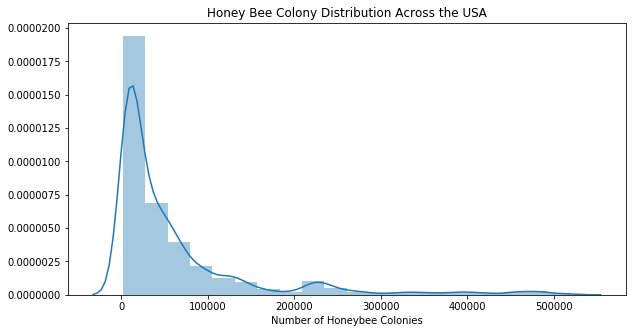

In [0]:
bee_colony = bees_2['numcol']
plt.figure(figsize=(10,5))
sns.distplot(bee_colony, bins=20)
plt.title('Honey Bee Colony Distribution Across the USA')
plt.xlabel('Number of Honeybee Colonies')

We can see the distribution of the number of honeybee colonies is right skewed.

Text(0.5, 0, 'Yield per Colony in Pounds')

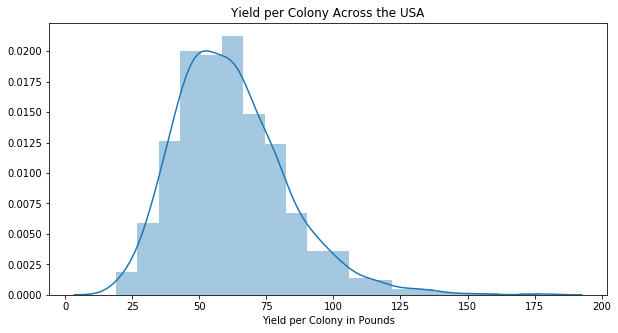

In [0]:
bee_yield = bees_2['yieldpercol']
plt.figure(figsize=(10,5))
sns.distplot(bee_yield, bins=20)
plt.title('Yield per Colony Across the USA')
plt.xlabel('Yield per Colony in Pounds')

We can see the data is more normalized here when plotting yield per colony (less skew). 

Text(0.5, 0, 'Total Production in Pounds')

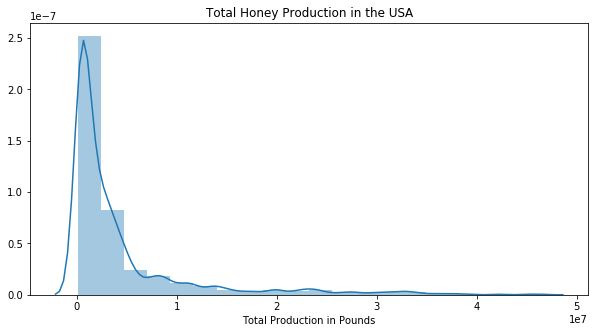

In [0]:
bee_total = bees_2['totalprod']
plt.figure(figsize=(10,5))
sns.distplot(bee_total, bins=20)
plt.title('Total Honey Production in the USA')
plt.xlabel('Total Production in Pounds')

Notice the heavy skew in the distribution of the total production data. Very similar shape to the total bee colonies histogram above. 

In [0]:
#rename columns
bees_3 = bees_2.rename(columns= {'nCLOTHIANIDIN':'Clothianidin', 'nIMIDACLOPRID':'Imidacloprid', 'nTHIAMETHOXAM':'Thiamethoxam', 'nACETAMIPRID':
                       'Acetamiprid', 'nTHIACLOPRID':'Thiacloprid'})

Text(0, 0.5, 'Amount used in kg')

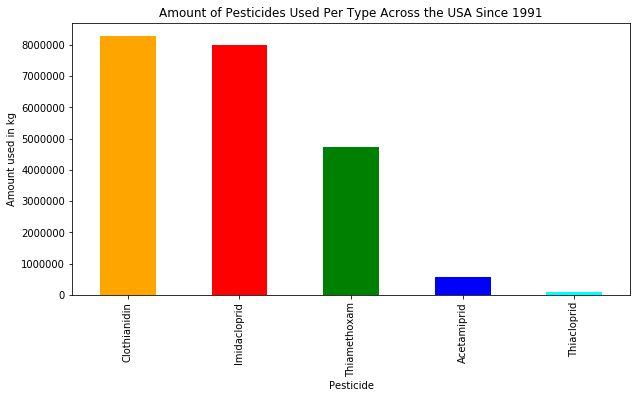

In [0]:
#plot the amounts of each pesticide used in kg

bee_pest = bees_3[['Clothianidin', 'Imidacloprid', 'Thiamethoxam', 'Acetamiprid', 'Thiacloprid']].sum()

plt.figure(figsize=(10,5))
bee_pest.plot.bar(color=['orange', 'red', 'green', 'blue', 'cyan'])
plt.title('Amount of Pesticides Used Per Type Across the USA Since 1991')
plt.xlabel('Pesticide')
plt.ylabel('Amount used in kg')

Clothianidin is the most used pesticide within this dataset, followed by imidacloprid, thiamethoxam, acetamiprid, and thiacloprid. All of these pesticides are in a class of insecticides called neonicotinoids and are given this name due to their similarity in structure to nicotine. They attack the centeral nervous system of insects as an agonist of acetylcholine and have been known to cause learning issues in bees, thus weakening the colony. They are popular in agriculture due to their relatively low toxicity to mammals. 

Now, why are insecticides used to produce honey? They are used to kill other pests that can be harmful to bees such as varroa mites. Seems counterintuitive, but there are diseases out there spread by other insects that can cause total colony collapse. These chemicals can stop those pests and as a result, stop the disease from affecting the colonies. But do the negatives of chemical use outweigh the benefits? Let's see if we can find out from this dataset.

Text(0.5, 1.0, 'Honey Bee Colony Pesticide Use Over Time in the USA')

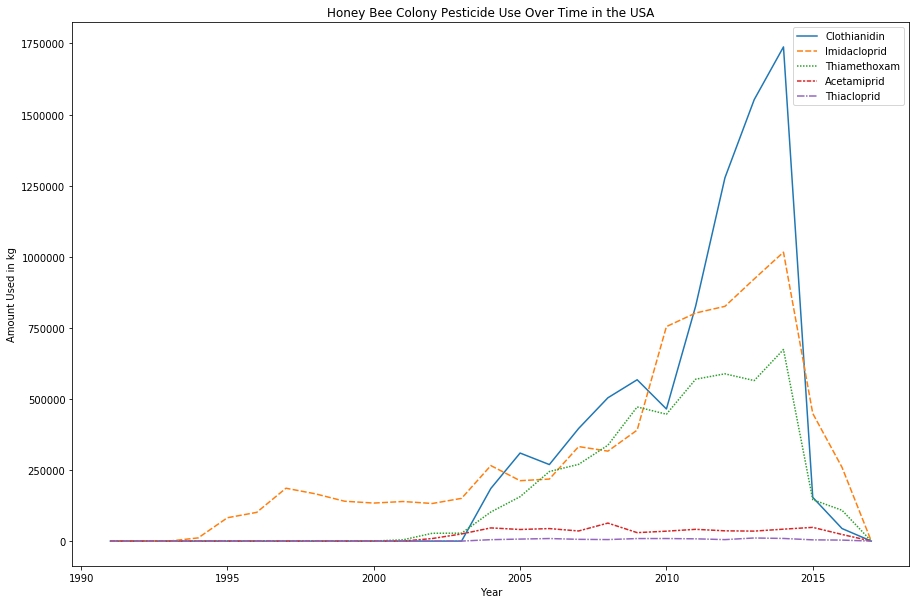

In [0]:
#graph a timeseries line plot of pesticide application amounts over time
bees_4 = bees_3[['year', 'Clothianidin', 'Imidacloprid', 'Thiamethoxam', 'Acetamiprid', 'Thiacloprid']]
bees_5 = bees_4.groupby(['year'])[['Clothianidin', 'Imidacloprid', 'Thiamethoxam', 'Acetamiprid', 'Thiacloprid']].sum()

plt.figure(figsize=(15,10))
ax = sns.lineplot(data=bees_5)
plt.xlabel('Year')
plt.ylabel('Amount Used in kg')
plt.title('Honey Bee Colony Pesticide Use Over Time in the USA')

As can be seen by the timeseries plot above, pesticide use of these specific chemicals have gone up significantly in recent years but a major decline is seen in the year 2015. I'm skeptical of this significant drop but given the recent news headlines about bee populations it wouldn't be surprising if this decrease is accurate.

Imidacloprid has been used for many years, as it is a very effective insecticide. It is used in many different applications including flea and tick medications for dogs. The other four chemical compounds (clothianidin, thiamethoxam, acetamiprid, and thiacloprid) weren't introduced to the market until the early 2000's. As we can see, clothianidin was heavily favored by beekeepers across the US in recent years.

Text(0, 0.5, 'Average Honey Yield per Colony in Pounds')

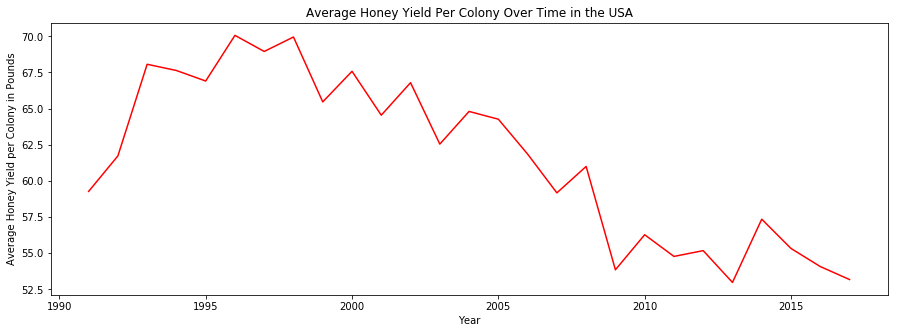

In [0]:
#plot yield per colony over time
bees_yield = bees_2[['year', 'yieldpercol']]
bees_yield_2 = bees_yield.groupby(['year'])['yieldpercol'].mean()

plt.figure(figsize=(15,5))
ax=sns.lineplot(data=bees_yield_2, color = 'red')
plt.title('Average Honey Yield Per Colony Over Time in the USA')
plt.xlabel('Year')
plt.ylabel('Average Honey Yield per Colony in Pounds')

As can be seen by the timeseries graph above, the yield per colony noticeably declines from the late 90's onward. And from our previous graph, we know that a wider variety of pesticides started to be used around the same time. Is there a relationship here? Could the introduction of these neonicotinoid chemicals be a major cause the yield per colony decline? Or are other factors such as climate at work here? Notice that there was an increase in yield per colony in the early to mid 90's, which is when imidacloprid was introduced. 

Since we know pesticide use went up, and yield per colony shows a downward trend over time, it would be interesting to look at total honey production by region in the USA over time.

<Figure size 1080x360 with 0 Axes>

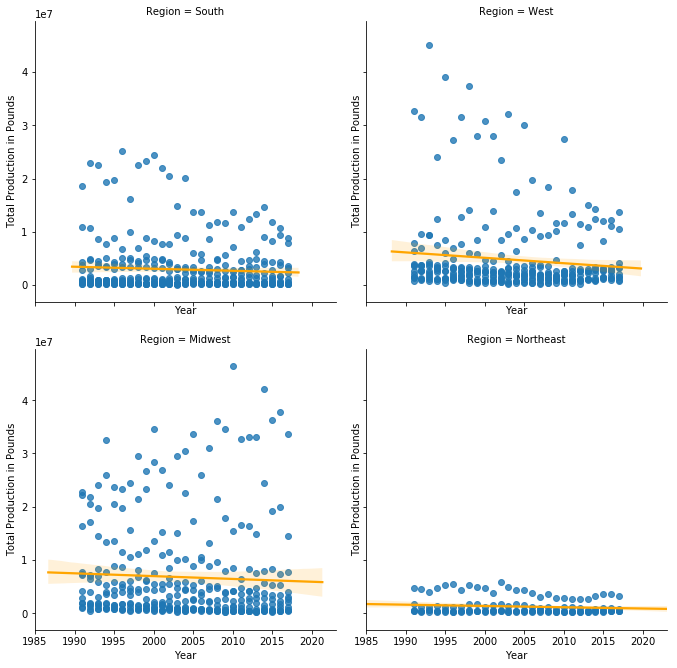

In [0]:
#plot total production over time per region
bees_plot = bees_2[['Region', 'year', 'totalprod', 'numcol', 'nAllNeonic', 'yieldpercol']]


plt.figure(figsize=(15,5))
ax = sns.FacetGrid(bees_plot, col='Region', col_wrap=2)
ax.map(sns.regplot, 'year', 'totalprod', line_kws={'color':'orange'})
ax.fig.set_size_inches(10,10)
ax.set(xlabel='Year', ylabel='Total Production in Pounds')

Overall honey production, although not overly significant, is on a downward trend while pesticide use is on an upward trend. The downward trend in production cannot be solely contributed to the decline in honey production but it could be a factor. One must consider outside factors contributing to such a decline in production.

Let's take a look at the yield per colony per region in the US.

<Figure size 1080x360 with 0 Axes>

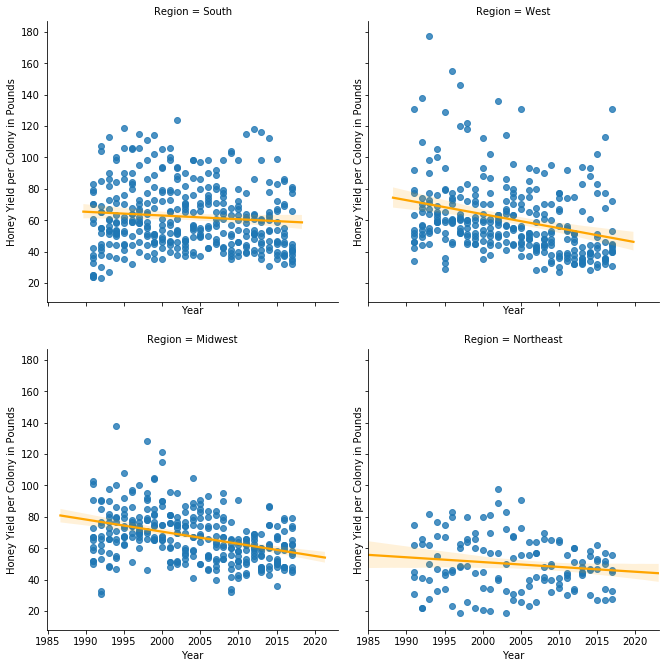

In [0]:
plt.figure(figsize=(15,5))
ax = sns.FacetGrid(bees_plot, col='Region', col_wrap=2)
ax.map(sns.regplot, 'year', 'yieldpercol', line_kws={'color':'orange'})
ax.fig.set_size_inches(10,10)
ax.set(xlabel='Year', ylabel='Honey Yield per Colony in Pounds')

Here we can see a sharper downward trend in the midwest and west, while the south and northeast have a flatter trendline. What does the average yield per colony look like per region?

Text(0, 0.5, 'Average Yield per Colony in Pounds')

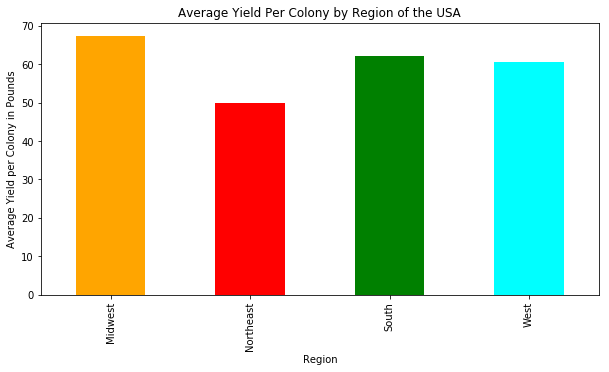

In [0]:
#plot average yield per colony in each region of the US and total production average per region

bees_region = bees_2[['yieldpercol', 'Region', 'totalprod']]
bees_region_yield = bees_region.groupby(['Region'])['yieldpercol'].mean()

plt.figure(figsize=(10,5))
bees_region_yield.plot.bar(color=['orange', 'red', 'green', 'cyan'])
plt.title('Average Yield Per Colony by Region of the USA')
plt.ylabel('Average Yield per Colony in Pounds')

We can see that different regions of the US have differing yields per colony on average. The midwest seems to have the highest average yield while the northeast has the lowest. Could this be due to favorable weather conditions? Chemicals used? Best beekeeping practices? The differences in yield per colony could be due to many factors and would need to be looked at closely in another study.

In [0]:
bees_pest_region = bees_3[['Region', 'Clothianidin', 'Imidacloprid', 'Thiamethoxam', 'Acetamiprid', 'Thiacloprid']]
bees_pest_region_total = bees_pest_region.groupby(['Region'])[['Clothianidin', 'Imidacloprid', 'Thiamethoxam', 'Acetamiprid', 'Thiacloprid']].sum()

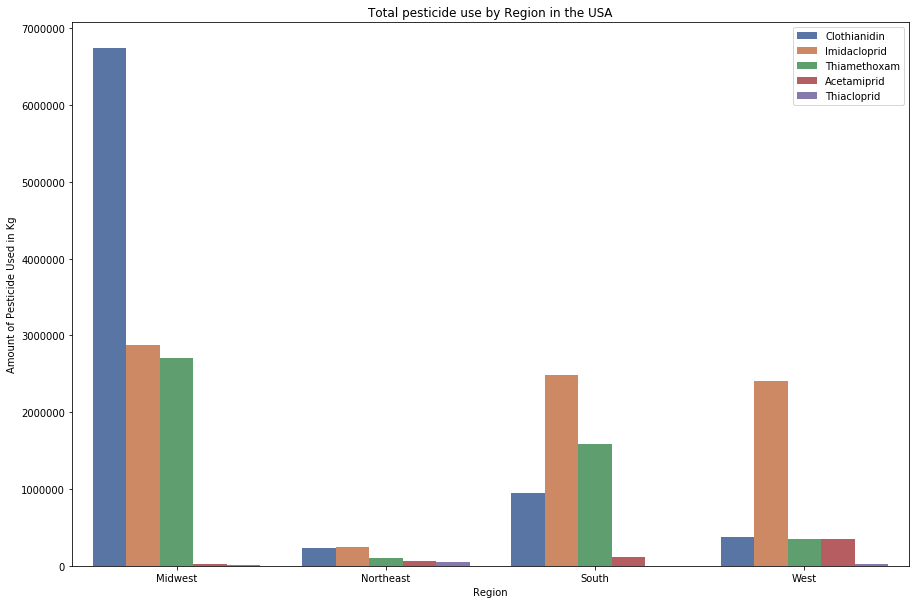

In [0]:
#graph total pesticide use grouped by region... increase the size of this graph

bees_pest_region_total_1 = bees_pest_region_total.reset_index()
bees_pest_region_total_2 = bees_pest_region_total_1.melt('Region', var_name='cols', value_name='vals')

plt.figure(figsize=(15,10))
ax = sns.barplot(x='Region', y='vals', hue='cols', palette='deep', data=bees_pest_region_total_2)
ax.set(title='Total pesticide use by Region in the USA', ylabel='Amount of Pesticide Used in Kg')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[0:], labels=labels[0:])


We can see that the midwest is the heaviest user of these pesticides, especially clothianidin. Does this have an overall positive effect on their honey production? Or negative?  

Text(0, 0.5, 'Region')

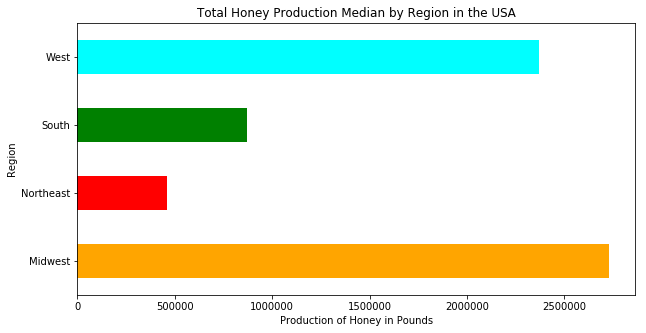

In [0]:
#plot the median values total honey production by region in the USA
bees_region_total = bees_region.groupby(['Region'])['totalprod'].median()

plt.figure(figsize=(10,5))
bees_region_total.plot.barh(color = ['orange', 'red', 'green', 'cyan'])
plt.title('Total Honey Production Median by Region in the USA')
plt.xlabel('Production of Honey in Pounds')
plt.ylabel('Region')


The midwest, although using the most pesticides over the dataset's timespan, has the highest total honey production in the US when considering the median as the favorable central tendency. Let's break this down further and look at pesticides used per colony.

[Text(0, 0.5, 'Region'),
 Text(0.5, 0, 'Pesticides Used per Colony used in Kg'),
 Text(0.5, 1.0, 'Median Pesticides Applied per Colony in the USA')]

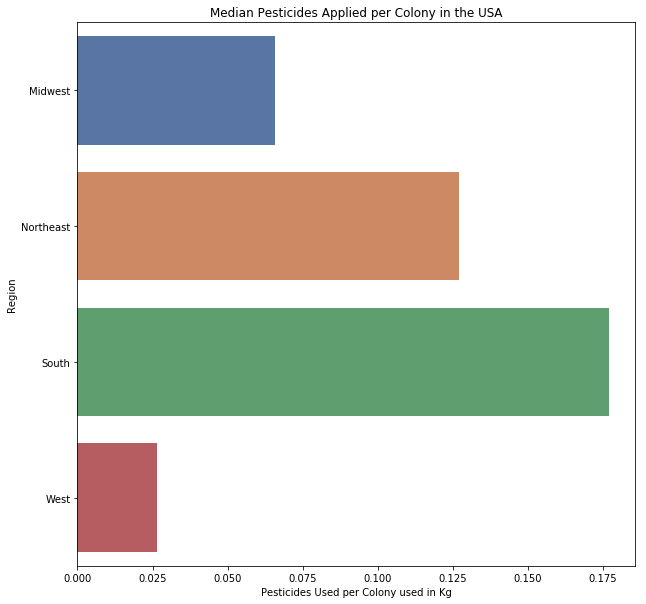

In [0]:
#plot pesticides used per colony per region in the USA

pest_per_col = bees_2[['Region', 'nAllNeonic', 'numcol']]

pest_per_col['pestpercol'] = pest_per_col.apply(lambda row: row.nAllNeonic / 
                                  row.numcol, axis = 1) 
pest_per_col_total = pest_per_col.groupby(['Region'])[['pestpercol']].median().reset_index()

plt.figure(figsize=(10,10))
ax = sns.barplot(y='Region', x='pestpercol', palette='deep', data=pest_per_col_total)
ax.set(ylabel='Region', xlabel='Pesticides Used per Colony used in Kg', title='Median Pesticides Applied per Colony in the USA')

The above graph gives us an interesting picture. Although the midwest tends to use the most pesticides overall, the south uses the most per bee colony. This would make sense as varroa mites are a problem year round in the south. 

Based on the data exploration, we cannot make any firm conclusions about whether the pesticides listed in the dataset affect honey production in the USA. However, some interesting observations have been made regarding honey production, yields and pesticide use. From this data exploration, an experiment is outlined below.

# The Experiment

This dataset shows some interesting relationships between a select few pesticides, honey bee populations, and colony efficiencies. However, there are many different pesticides used for honey production, not just neonicotinoids. Neonicotinoids are very popular insecticides due to their relatively harmless effects on mammals. However, they have been widely blamed for bee colony collapse disorder since their release. It has been proven that they affect bees' ability to learn basic concepts, thus weakening the colony overall. Bees travel vast distances to find pollen and food sources so they can be exposed to a wide variety of chemicals along the way. It would be interesting to see if a specific pesticide has an effect on yields per colony or overall colony health. It could be tricky to control the variables here, but we may be able to give some interesting insight into the world of honey production.

As of 2019, the most commonly used pesticide in apiaries is fluvalinate. Fluvalinate is used to control varroa mites, which are capable of spreading a devastating disease to honeybee colonies. It belongs to a class of chemicals called pyrethroids, it is a neurotoxin that causes hyperexcitability that ultimately leads to death in insects. It is highly effective on mites and since fluvalinate was not part of this dataset, it would be interesting to set up an experiment studying this chemical and its effects on honeybee colonies. 

The main question from this experiment would be: Does fluvalinate negatively affect honeybee health and mortality thus negatively affecting honey yields per colony? 

Hypothesis: Fluvalinate will negatively impact honeybee mortality, therefore decreasing yields per colony.
Null hypothesis: Fluvalinate will have no impact on honeybee mortality, thus no impact on yields per colony.

In order to cancel out as many variables as possible, this experiment will need significant controls. Bees are complex creatures, they require food and pollen to develop honey. Honeybees, especially, like to fly vast distances outdoors to obtain their pollen as they are natural explorers. In order to control the experiment, the bees will need to be caged so we can evaluate bee health and mortality rates. Since bee health and mortality have a direct impact on honey yields per colony, we can assume that decreased bee health leads to lower honey yields per colony and vice versa. 

The experiment will look at two populations of honeybees. Each group will be obtained from the same apiary. Since honeybee colonies can vary significantly in size, we would need to choose two colonies of similar size. One group will be fed plain sugar syrup as their food source, while the other group will be fed the same sugar syrup but laced with fluvalinate. To start, the experimental group's food source should be laced with 100 parts per billion of fluvalinate. Each group's mortality rate will be measured for 25 days. 

Other metrics that could be looked at as signs of bee health would be behavior abnormalities. These behavior abnormalities could be divided into different groups such as: vomiting, apathy, and inability to mobilize. It is known that chemicals can have an effect on bee behavior so this is another variable that can be measured to determine bee health. 

Using mortality rates as our primary metric, after 25 days, the mortality rates of each population will be calculated. t tests should be performed on both groups (assuming a normal distribution of data). As with most studies of this nature, a p value < 0.05 will need to be achieved between the treated and untreated group of bees to prove the findings significant. Should no statistical significance (p > 0.05) result from the experiment, it should be repeated with a higher dosage of fluvalinate. A secondary metric that should be measured is honey production of both of these populations. If mortality rates among the two populations achieve statistical significane (p < 0.05), it would be considered a success and further research could be conducted regarding dosage levels of the pesticide. 